In [ ]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("/content/banana_quality.csv")

# Preview
df.head()


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target variable
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

# Features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

# Untuned Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest - Untuned")
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest - Untuned
F1 Score: 0.9756394640682094
ROC AUC: 0.9942616069376633
Confusion Matrix:
 [[759  22]
 [ 18 801]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

rf_best = grid_rf.best_estimator_
rf_best_pred = rf_best.predict(X_test)

print("\nRandom Forest - Tuned")
print("Best Params:", grid_rf.best_params_)
print("F1 Score:", f1_score(y_test, rf_best_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_best_pred))



Random Forest - Tuned
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score: 0.974390243902439
ROC AUC: 0.9944265437223184
Confusion Matrix:
 [[759  22]
 [ 20 799]]


In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print("\nSVM - Untuned")
print("F1 Score:", f1_score(y_test, svm_pred))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))



SVM - Untuned
F1 Score: 0.9817073170731707
ROC AUC: 0.9957788690183056
Confusion Matrix:
 [[765  16]
 [ 14 805]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

rand_svm = RandomizedSearchCV(SVC(probability=True, random_state=42), param_dist_svm,
                              n_iter=5, cv=3, scoring='f1', n_jobs=-1, random_state=42)
rand_svm.fit(X_train_scaled, y_train)

svm_best = rand_svm.best_estimator_
svm_best_pred = svm_best.predict(X_test_scaled)

print("\nSVM - Tuned")
print("Best Params:", rand_svm.best_params_)
print("F1 Score:", f1_score(y_test, svm_best_pred))
print("ROC AUC:", roc_auc_score(y_test, svm_best.predict_proba(X_test_scaled)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_best_pred))



SVM - Tuned
Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
F1 Score: 0.978021978021978
ROC AUC: 0.9944171634312479
Confusion Matrix:
 [[763  18]
 [ 18 801]]


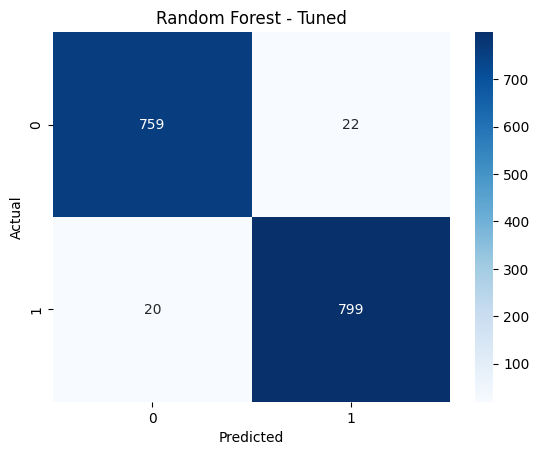

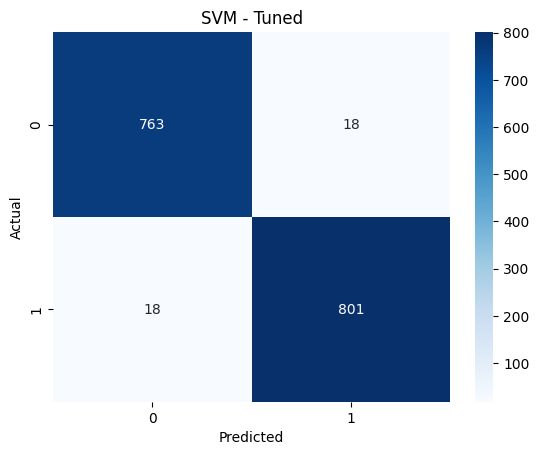

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(confusion_matrix(y_test, rf_best_pred), "Random Forest - Tuned")
plot_cm(confusion_matrix(y_test, svm_best_pred), "SVM - Tuned")
